# **윈도우 함수**

```sql
SELECT WINDOW_FUNCTION([컬럼]) OVER
( [PARTITION BY 컬럼] [ORDER BY 컬럼] [WINDOWING 절] )
FROM 테이블명 ;
```



- 윈도우 함수는 로우 간의 관계를 구할 수 있도록 만들어 놓은 함수.
- 로우 간의 순위, 집계, 순서, 비율 등을 구할 수 있는 함수를 제공.
- 인자가 있는 함수도 있고 없는 함수도 있다.

<br>



- ORDER BY 절을 사용하여 어떤 컬럼 기준으로 순위를 정할지 지정할 수 있다.
- 순위 함수가 아닐 경우에는 정렬로 사용한다.
  - 아래는 ORDER BY를 사용하여 모든 로우에 대해서 매출액 기준으로 순위를 구하는 예시이다.

```sql
SELECT 부서번호, 사원번호, 사원명, 매출액
	,RANK() OVER (ORDER BY 매출액 DESC) AS 순위
FROM 사원
ORDER BY 순위;
```

<br>

- 모든 로우간의 관계를 구할 수도 있으며, PARTITION BY 절을 사용하여 특정 그룹 조건을 기준으로도 관계를 구할 수 있다.
  - 아래는 PARTITION BY를 사용하여 같은 부서 안에서 매출액 기준으로 순위를 구하는 예시이다.

```sql
SELECT 부서번호, 사원번호, 사원명, 매출액
	,RANK() OVER (PARTITION BY 부서번호 ORDER BY 매출액 DESC) AS 순위
FROM 사원
ORDER BY 부서번호, 순위;
```


- WINDOWING 절을 사용하여 윈도우 함수에 포함시킬 로우의 조건(범위)을 지정할 수 있다. 크게 ROWS와 RANGE를 사용할 수 있다.

  - ROWS : 현재 ROW 위치에서 물리적인 범위

  - RANGE : 현재 ROW 값을 기준으로 논리적인 범위

- UNBOUNDED PRECEDING이라는 것을 가지고 ROWS와 RANGE를 비교하여 설명한다.

  - ROWS UNBOUNDED PRECEDING : ROWS UNBOUNDED PRECEDING은 현재 행과 현재 행 위에 있는 모든 행들을 함수에 사용하라는 의미.
  - 아래 예시는 부서 번호 기준으로 행이 출력되며 아래로 내려가면서 매출액을 계속 SUM 하여 매출액 합계를 구하는 쿼리.
  - 즉, 첫 번째 행은 자신의 매출액만 표현되고, 맨 아래 행은 모든 매출액의 합이 출력.

```sql
SELECT 부서번호, 사원명, 매출액
	,SUM(매출액) OVER (ORDER BY 부서번호 ROWS UNBOUNDED PRECEDING) AS 매출액합계
FROM 사원;
```

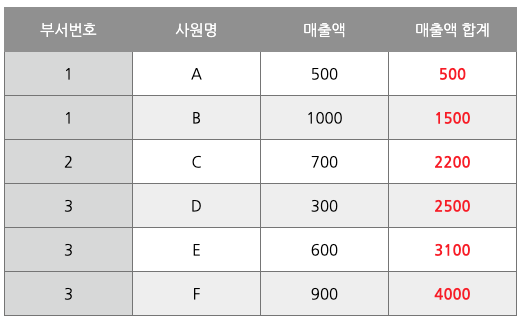

- RANGE UNBOUNDED PRECEDING : RANGE UNBOUNDED PRECEDING은 현재 행의 값을 기준으로 이하의 값을 함수에 사용하라는 의미.
  -  아래 예시는 부서 그룹내에서 자신의 매출액보다 작은 매출액을 모두 SUM하여 매출액 합계를 구하는 쿼리.
  - 즉, 자신의 값 + 자신보다 작은 모든값의 합이 출력.

```sql
SELECT 부서번호, 사원명, 매출액
	,SUM(매출액) OVER (PARTITION BY 부서번호 ORDER BY 매출액 RANGE UNBOUNDED PRECEDING) AS 매출액합계
FROM 사원;
```

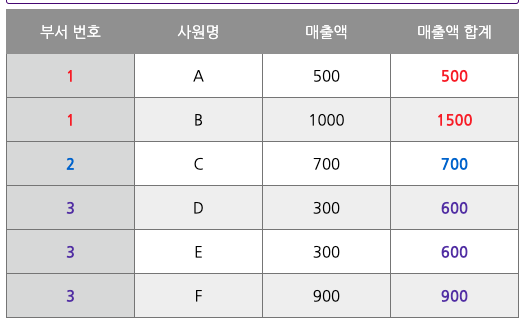

- UNBOUNDED PRECEDING 이외에 WINDOWING 절은 아래와 같이 다양하게 존재.

  - ROWS 숫자(N) PRECEDING : 현재 행과 바로 위의 행 N 개의 값을 함수에 사용하라는 의미.
  - 아래 예시는 부서 번호 기준으로 행이 출력되며 첫 번째 행은 자신의 매출액만 표현되고, 두 번째 행부터는 자신 행의 바로 위의 행의 매출액과 자신의 매출액을 더한 매출액이 표현.

```sql
SELECT 부서번호, 사원명, 매출액
	,SUM(매출액) OVER (ORDER BY 부서번호 ROWS 1 PRECEDING) AS 매출액합계
FROM 사원;
```

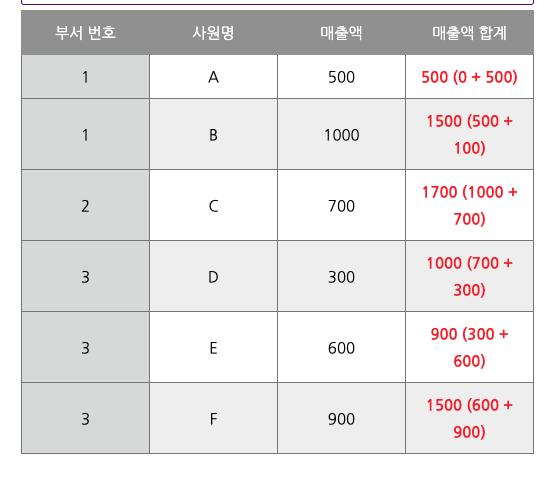

- WINDOWING 절은 사실 BETWEEN이라는 구문이 생략되었다. 위에서 설명한 절을 BETWEEN으로 표현하면 다음과 같다.

  - ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
  - RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
  - ROWS BETWEEN 숫자(N) PRECEDING AND CURRENT ROW




- BETWEEN은 윈도우의 시작과 끝 위치를 지정하는 것으로 생략 가능.
 - 생략한다면 위와 같이 CURRENT ROW, 즉 현재 행을 끝 위치로 지정하는 것이다. 따라서 위에 결과를 보면 항상 현재 행에서 멈춘 것을 확인할 수 있다.


- 현재 행이 아닌 맨 마지막 행을 끝 위치로 표현하고 싶다면 AND 뒤에 UNBOUNDED FOLLOWING을 사용하면 된다.


- 자신보다 위에 있는 N개만큼을 함수에 포함하는 숫자(N) PRECEDING 절처럼 FOLLOWING도 숫자(N) FOLLOWING 과 같이 사용하여 현재 행을 기준으로 끝 위치를 N개만큼 지정할 수 있다.

# **윈도우 순위 함수**

- RANK

```sql
SELECT 사원번호, 사원명, 매출액
	,RANK() OVER (ORDER BY 매출액 DESC) AS 순위
FROM 사원
ORDER BY 순위
```

- ORDER BY에 기술한 컬럼 기준으로 순위를 구하는 함수이다.
- 동일한 값에 대해서는 동일한 순위를 부여하고, 다음 순위는 비워둔다.


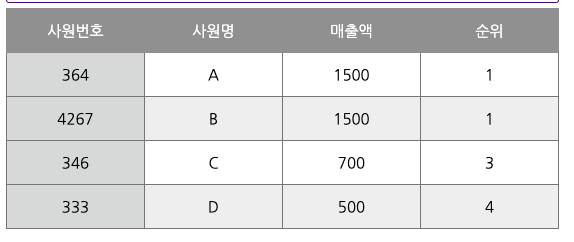


- DENSE_RANK



```sql
SELECT 사원번호, 사원명, 매출액
	,DENSE_RANK() OVER (ORDER BY 매출액 DESC) AS 순위
FROM 사원
ORDER BY 순위
```


- ORDER BY에 기술한 컬럼 기준으로 순위를 구하는 함수이다.
- 동일한 값에 대해서는 동일한 순위를 부여하고, 다음 순위는 RANK 함수와 다르게 비워두지 않는다.

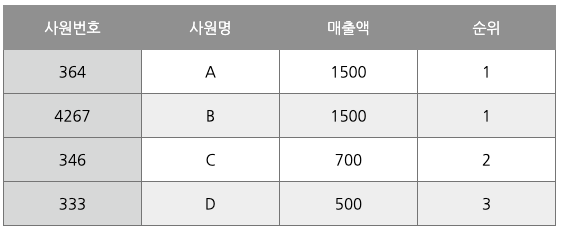

- ROW_NUMBER



```sql
SELECT 사원번호, 사원명, 매출액
	,ROW_NUMBER() OVER (ORDER BY 매출액 DESC) AS 순위
FROM 사원
ORDER BY 순위
```

- ORDER BY에 기술한 컬럼 기준으로 순위를 구하는 함수이다.
- 동일한 값이라도 고유한 순위를 부여한다. 오라클의 경우 ROWID가 작은 행이 우선순위가 높다.
- 만약 동일한 값에 대해서 순서를 관리하고 싶다면 ORDER BY절에 다른 조건의 컬럼을 추가해야 한다.


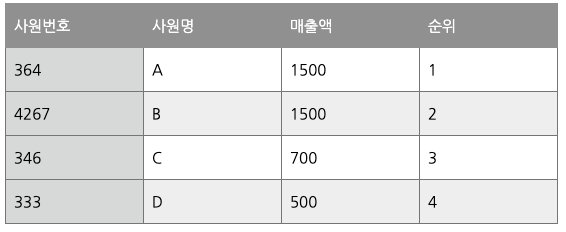

**윈도우 집계 함수**

- 윈도우 집계 함수에는 SUM, MAX, MIN, AVG, COUNT가 있으며 특별하게 주의해야 할 점이 없으므로 설명은 생략.



# **윈도우 순서 함수**

- 윈도우 순서 함수에는 FIRST_VALUE, LAST_VALUE, LAG, LEAD가 있다.
- FIRST_VALUE와 LAST_VALUE는 각각 집계 함수의 MAX와 MIN 함수와 동일한 결과를 출력한다.


- LAG를 이용해 파티션 별 윈도우에서 이전 몇 번째 행의 값을 가져올 수 있다. 반대로 LEAD는 이후 몇 번째 행의 값을 가져올 수 있다.

<br>
- LAG

  - LAG의 두 번째 인자는 이전 몇 번째 행의 값을 가져올지를 정하는 인수이며, 세 번째 인자는 이전 몇 번째 행의 값을 가져올 수 없거나 NULL일 경우에 세팅할 값을 설정한다.


```sql
SELECT 사원번호, 사원명, 매출액
	,LAG(매출액, 1, 9999) OVER (ORDER BY 매출액 DESC) AS 내_바로_위_매출액
FROM 사원;
```

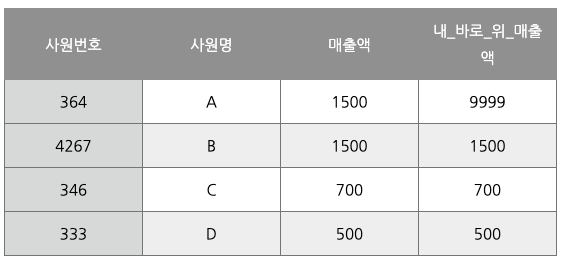



- LEAD

  - LAG와는 반대로 이후 몇 번째 행의 값을 가져올 수 있다. 함수 사용 방법은 LAG와 동일하다.

# **윈도우 비율 함수**

- CUME_DIST


- CUME_DIST는 누적 분포를 계산하는 것이다.
- 즉 윈도우 중에 자신의 위치가 어느 정도인지 0~1 사이로 표현한다.
- NULL 값도 계산에 포함한다. 그리고 가능한 가장 낮은 값으로 NULL을 취급한다.


```sql
SELECT 사원번호, 사원명, 매출액
	,CUME_DIST() OVER (ORDER BY 매출액 DESC) AS 누적분포율
FROM 사원;
```

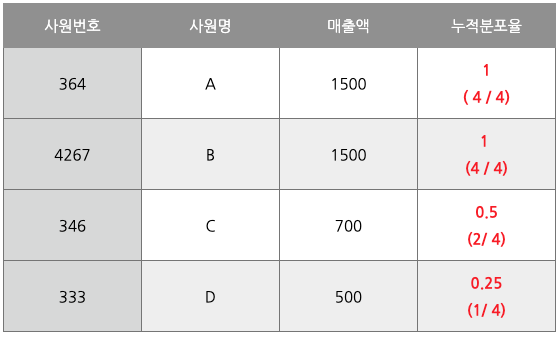



- PERCENT_RANK

  - 백분율의 순위를 계산한다.

```sql
SELECT 사원번호, 사원명, 매출액
	,PERCENT_RANK() OVER (ORDER BY 매출액 DESC) AS 백분율순위
FROM 사원;
```

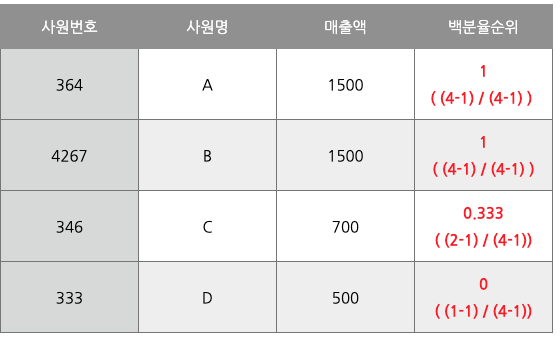


- NTILE

  - 값을 N개의 타일(등분)하여 그룹핑 번호를 반환한다.


```sql
SELECT 사원번호, 사원명, 매출액
	,NTILE(2) OVER (ORDER BY 매출액 DESC) AS 타일번호
FROM 사원;
```

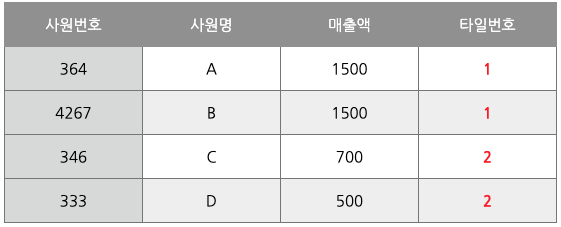